# Ejercicio 1
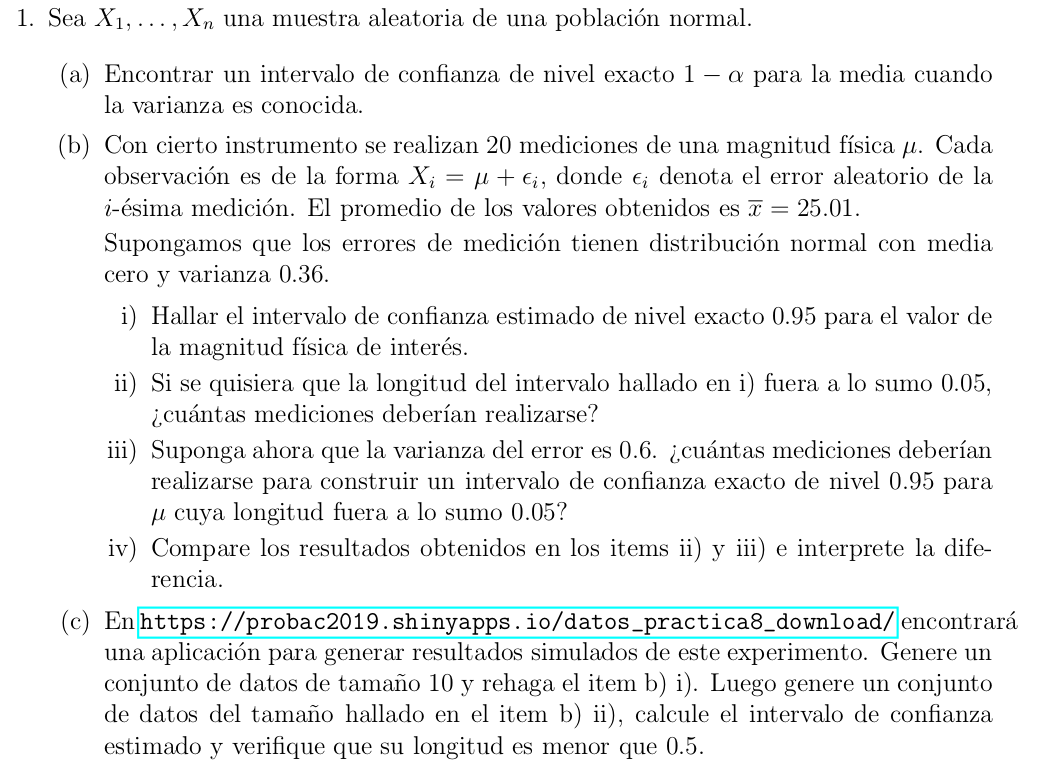

a) $$[\bar{X} - Z_{\frac{\alpha}{2}} \frac{\sigma_0}{\sqrt{n}}, \bar{X} + Z_{\frac{\alpha}{2}} \frac{\sigma_0}{\sqrt{n}}]$$

In [24]:
#b)
media_obs = 25.01
sigma_0 = sqrt(0.36)
n=20
alpha = 1 - 0.95
z_medioalpha = qnorm(1-alpha/2)

limInf = media_obs - z_medioalpha * sigma_0/sqrt(n)
limSup = media_obs + z_medioalpha * sigma_0/sqrt(n)

cat('b)\n i) intervalo nivel 0.95: [', limInf, ',', limSup, ']')
cat('\n ii) n > ', 4 * z_medioalpha^2 * sigma_0^2 / 0.05^2)
cat('\n iii) n > ', 4 * z_medioalpha^2 * sqrt(0.6)^2 / 0.05^2)

b)
 i) intervalo nivel 0.95: [ 24.74704 , 25.27296 ]
 ii) n >  2212.68
 iii) n >  3687.8

In [26]:
#c)
for(n in c(10, 797, 2213, 3688)){    
    datos = read.csv(sprintf('datos_Practica8_ej1n_%d.csv', n))$mediciones
    media_obs = mean(datos)
    limInf = media_obs - z_medioalpha * sigma_0/sqrt(n)
    limSup = media_obs + z_medioalpha * sigma_0/sqrt(n)

    cat('Para n=', n, ' intervalo nivel 0.95: [', limInf, ',', limSup, '], longitud', limSup-limInf, '< 0.05\n')
}


Para n= 10  intervalo nivel 0.95: [ 24.4916 , 25.23536 ], longitud 0.743754 < 0.05
Para n= 797  intervalo nivel 0.95: [ 24.95838 , 25.0417 ], longitud 0.08331058 < 0.05
Para n= 2213  intervalo nivel 0.95: [ 24.97665 , 25.02664 ], longitud 0.04999639 < 0.05
Para n= 3688  intervalo nivel 0.95: [ 24.98772 , 25.02645 ], longitud 0.03872879 < 0.05


In [26]:
#de la clase practica con alpha = 0.1, Z_{alpha/2} le daba 1.64
alpha = 0.1
pnorm(alpha/2)
1-pnorm(alpha/2)

qnorm(alpha/2) #OK PERO QUEDA NEGATIVO
1-qnorm(alpha/2)

qnorm(1-alpha/2) #CORRECTO
1-qnorm(1-alpha/2)

[1] 0.5199388

[1] 0.4800612

[1] -1.644854

[1] 2.644854

[1] 1.644854

[1] -0.6448536

# Ejercicio 2
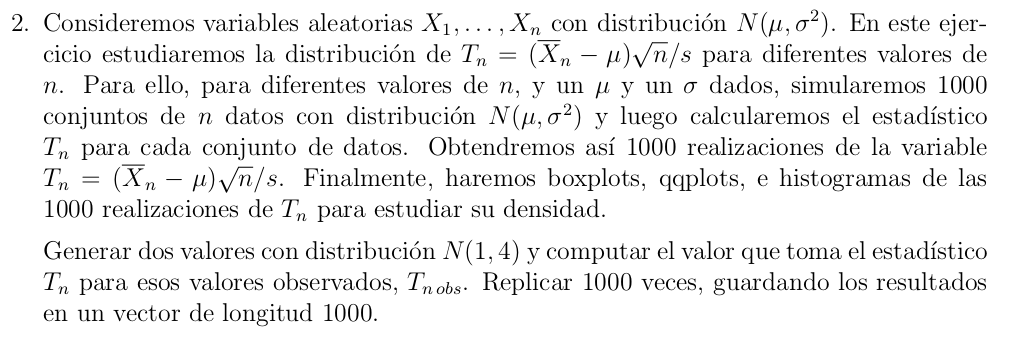

In [6]:
tnobs = function(n, mu, sigma){
    datos = rnorm(n, mu, sigma)
    (mean(datos) - mu) * sqrt(n) / sd(datos)
}

tn = function(n, mu, sigma){
    datos = rnorm(n, mu, sigma)
    (mean(datos) - mu) * sqrt(n) / sigma
}

mu = 1
sigma = sqrt(4)

resultados = replicate(1000, tnobs(100, mu, sigma)) #2 son muy pocos!

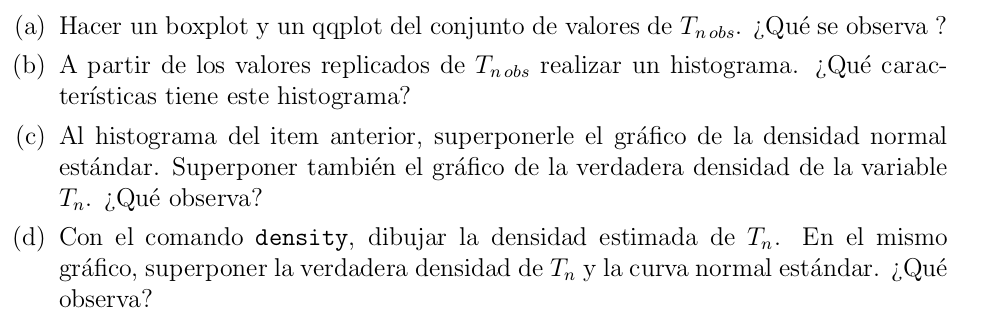

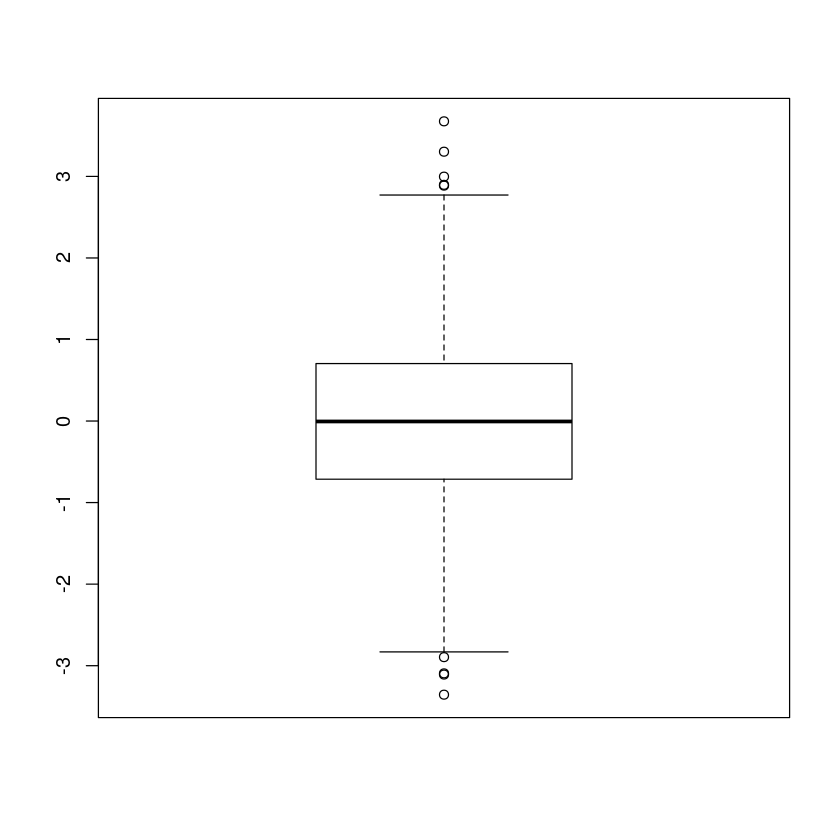

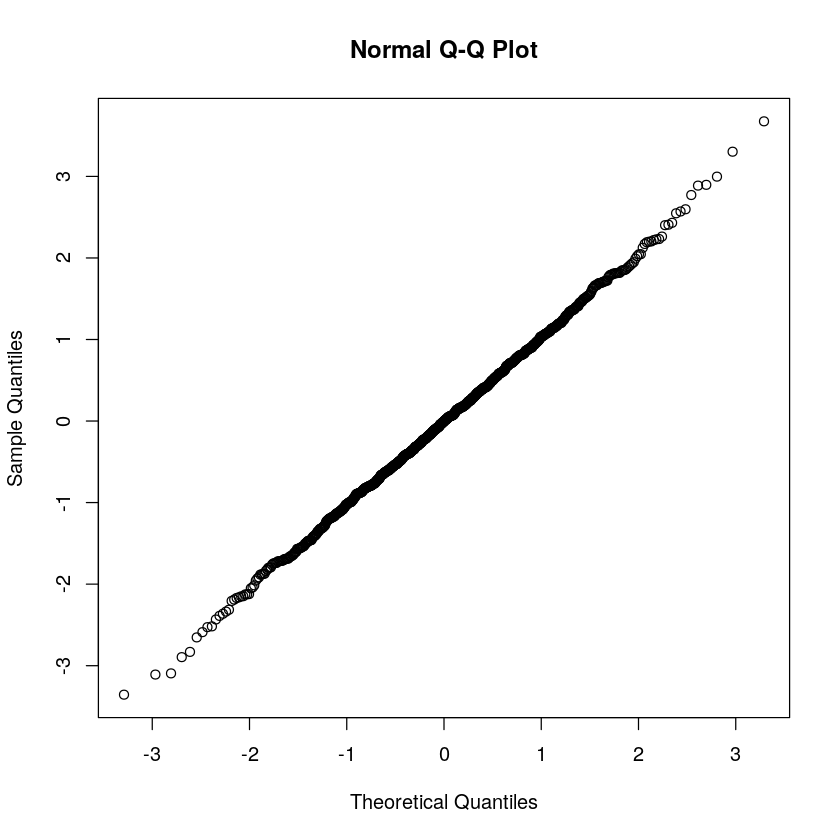

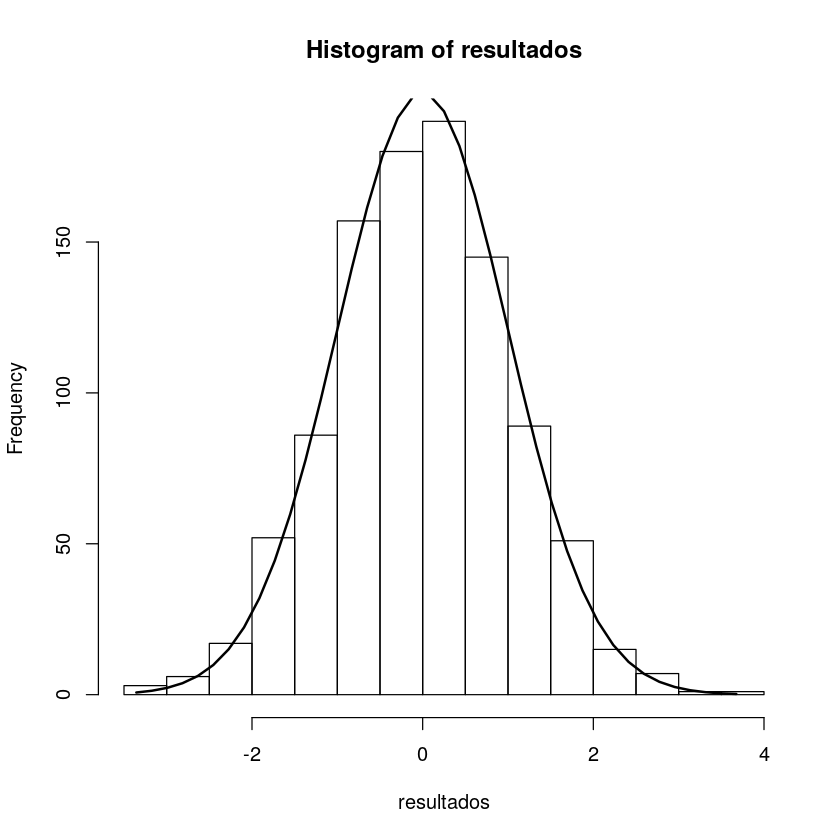

In [12]:
#a
boxplot(resultados)
qqnorm(resultados)
#b y c
h = hist(resultados)
xfit = seq(min(resultados), max(resultados), length = 40)
yfit = dnorm(xfit)
yfit = yfit * diff(h$mids[1:2]) * length(resultados) 

lines(xfit, yfit, col = "black", lwd = 2)

# c y d ?? ver bien a que se refiere

# Ejercicio 3

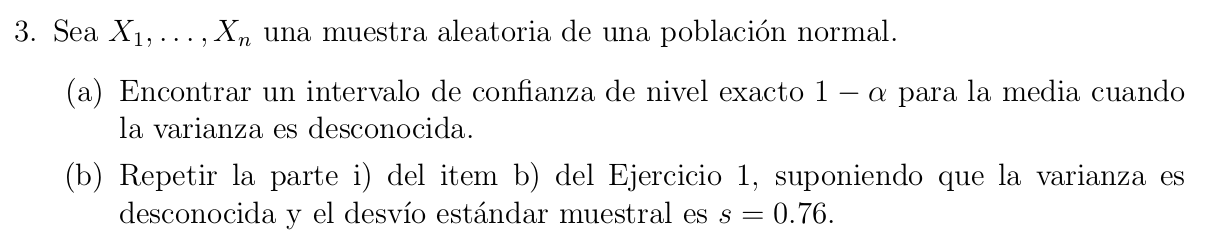

- Functions that produce confidence intervals for means by the traditional method include t.test, CI in Rmisc, and MeanCI in DescTools.

# Resumen intervalos
## Intervalos para distribución normal $\mathcal{N}(\mu,\sigma^2)$

In [49]:
# Para mu
int_conf_normal_mu = function(datos, nivel, sigma){
    alpha = 1-nivel
    
    media_obs = mean(datos)
    n=length(datos)
    
    if(missing(sigma)) {
        t_n1medioalpha = qt(1-alpha/2, df=n-1)
        
        limInf = media_obs - t_n1medioalpha * sd(datos)/sqrt(n)
        limSup = media_obs + t_n1medioalpha * sd(datos)/sqrt(n)
    } else {
        z_medioalpha = qnorm(1-alpha/2)
        
        limInf = media_obs - z_medioalpha * sigma/sqrt(n)
        limSup = media_obs + z_medioalpha * sigma/sqrt(n)
    }
    c(limInf, limSup)
}

# Para sigma
int_conf_normal_sigma = function(datos, nivel, mu){
    alpha = 1-nivel
    n=length(datos)
    
    if(missing(mu)) {
        chi_inf = qchisq(1-alpha/2, df=n-1)
        chi_sup = qchisq(alpha/2, df=n-1)
        
        limInf = (n-1)*var(datos)/chi_inf
        limSup = (n-1)*var(datos)/chi_sup
    } else {
        chi_inf = qchisq(1-alpha/2, df=n)
        chi_sup = qchisq(alpha/2, df=n)
        
        limInf = sum((datos-mu)^2)/chi_inf
        limSup = sum((datos-mu)^2)/chi_sup
    }
    c(limInf, limSup)
}

In [51]:
int_conf_normal_mu(c(3, 7, 11, 0, 7, 0, 4, 5, 6, 2), 0.88) #> [2.631598, 6.368402]
int_conf_normal_mu(c(3, 7, 11, 0, 7, 0, 4, 5, 6, 2), 0.88, 2) #> [3.516675, 5.483325]

int_conf_normal_sigma(c(3, 7, 11, 0, 7, 0, 4, 5, 6, 2), 0.88)
int_conf_normal_sigma(c(3, 7, 11, 0, 7, 0, 4, 5, 6, 2), 0.88, 5)

[1] 2.631598 6.368402

[1] 3.516675 5.483325

[1]  6.515388 30.242848

[1]  6.15363 26.22257

## Intervalo para $\theta$ de distribución uniforme $U(0,\theta)$

In [54]:
int_conf_unif = function(datos, nivel){
    alpha = 1-nivel
    c(max(datos), max(datos)/alpha^(1/length(datos)))
}

In [56]:
int_conf_unif(runif(10, 0, 5), 0.95)

[1] 4.417760 5.960807

## Intervalo para $\mu$ de una distribución desconocida

In [63]:
int_conf_mu = function(datos, nivel, sigma){
    alpha = 1-nivel
    
    media_obs = mean(datos)
    n=length(datos)
    z_medioalpha = qnorm(1-alpha/2)
    
    if(missing(sigma)) {
        sigma = sd(datos)
    }
    limInf = media_obs - z_medioalpha * sigma/sqrt(n)
    limSup = media_obs + z_medioalpha * sigma/sqrt(n)
    
    c(limInf, limSup)
}

In [122]:
datos = runif(10, 1, 40)
int_conf_mu(datos, 0.95) #asintotico
int_conf_mu(datos, 0.95, sqrt((40-1)^2/12)) #asintotico

[1] 11.45202 24.22541

[1] 10.86086 24.81657

## Intervalo para $\lambda$ de distribución exponencial $\mathcal{E}(\lambda)$

In [111]:
int_conf_exp = function(datos, nivel, exacto=TRUE){
    alpha = 1-nivel
    
    n=length(datos)
    
    if(exacto){
        chi_inf = qchisq(alpha/2, df=2*n)
        chi_sup = qchisq(1-alpha/2, df=2*n)
        
        limInf = chi_inf / (2*sum(datos))
        limSup = chi_sup / (2*sum(datos))
    }else{
        z_medioalpha = qnorm(1-alpha/2)
        
        limInf = (1-z_medioalpha/sqrt(n))/mean(datos)
        limSup = (1+z_medioalpha/sqrt(n))/mean(datos)
    }
    c(limInf, limSup)
}

In [114]:
datos = rexp(10, 6)
int_conf_exp(datos, 0.95) #exacto
int_conf_exp(datos, 0.95, FALSE) #asintotico

[1]  4.283116 15.259701

[1]  3.395892 14.467587

## Intervalo para  $p$ de distribución binomial $Bi(k,p)$

In [115]:
int_conf_binom = function(datos, nivel, k){
    if(missing(k)) {
        print('Falta pasar el k')
    }    
    alpha = 1-nivel
    
    media_k = mean(datos)/k
    n=length(datos)
    
    z_medioalpha = qnorm(1-alpha/2)
        
    limInf = media_k - z_medioalpha * sqrt((media_k*(1-media_k))/(n*k))
    limSup = media_k + z_medioalpha * sqrt((media_k*(1-media_k))/(n*k))

    c(limInf, limSup)
}

In [121]:
int_conf_binom(rbinom(10,5,0.6), 0.95, 5) #asintotico

[1] 0.4854602 0.7545398